<a href="https://colab.research.google.com/github/SupriyaSakshana/DL-Simplified/blob/main/FINAL_UPHAAR_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving UPHAAR_dataset_cleanedReport.csv to UPHAAR_dataset_cleanedReport.csv
Dataset Loaded: 150 rows, 12 columns
Columns Detected: ['visitor_id', 'visitor_name', 'gift_id', 'gift_name', 'gift_description', 'gift_category', 'price', 'state', 'suitable_for_profile', 'preferences', 'festival', 'country']

Logistic Regression Performance (Fold 1):
 Accuracy: 0.9733
                          precision    recall  f1-score   support

          Banarasi Saree       1.00      1.00      1.00         9
Brassware from Rajasthan       0.80      1.00      0.89         4
        Chikankari Kurta       1.00      1.00      1.00         2
         Handicraft Item       1.00      0.00      0.00         1
          Kashmiri Shawl       1.00      1.00      1.00         5
      Kerala Metal Craft       1.00      1.00      1.00         7
            Lacquer Ware       1.00      0.50      0.67         2
      Madhubani Painting       1.00      1.00      1.00         7
       Mysore Sandalwood       1.00      

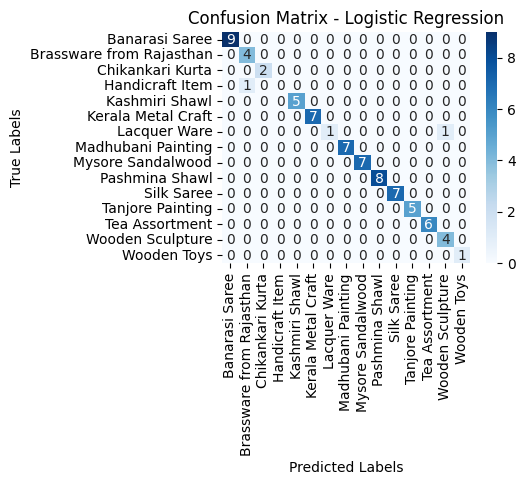


Logistic Regression Performance (Fold 2):
 Accuracy: 0.9467
                          precision    recall  f1-score   support

          Banarasi Saree       1.00      1.00      1.00        10
Brassware from Rajasthan       1.00      1.00      1.00         3
        Chikankari Kurta       1.00      1.00      1.00         3
         Handicraft Item       1.00      0.00      0.00         1
          Kashmiri Shawl       1.00      1.00      1.00         4
      Kerala Metal Craft       0.88      1.00      0.93         7
            Lacquer Ware       1.00      0.50      0.67         2
      Madhubani Painting       0.75      1.00      0.86         6
       Mysore Sandalwood       1.00      1.00      1.00         8
          Pashmina Shawl       1.00      1.00      1.00         8
              Silk Saree       1.00      1.00      1.00         7
        Tanjore Painting       1.00      0.80      0.89         5
          Tea Assortment       0.83      1.00      0.91         5
        Wooden

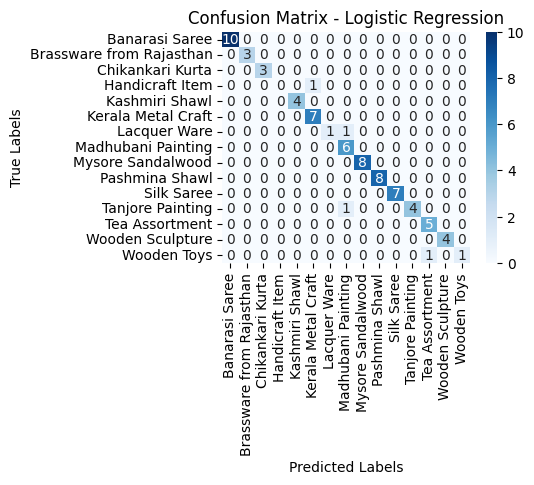


Logistic Regression Average Accuracy (Cross-Validated): 0.9600

SVM Performance (Fold 1):
 Accuracy: 0.9467
                          precision    recall  f1-score   support

          Banarasi Saree       0.90      1.00      0.95         9
Brassware from Rajasthan       0.80      1.00      0.89         4
        Chikankari Kurta       1.00      0.50      0.67         2
         Handicraft Item       1.00      0.00      0.00         1
          Kashmiri Shawl       1.00      1.00      1.00         5
      Kerala Metal Craft       1.00      1.00      1.00         7
            Lacquer Ware       1.00      0.00      0.00         2
      Madhubani Painting       0.88      1.00      0.93         7
       Mysore Sandalwood       1.00      1.00      1.00         7
          Pashmina Shawl       1.00      1.00      1.00         8
              Silk Saree       1.00      1.00      1.00         7
        Tanjore Painting       1.00      1.00      1.00         5
          Tea Assortment       1

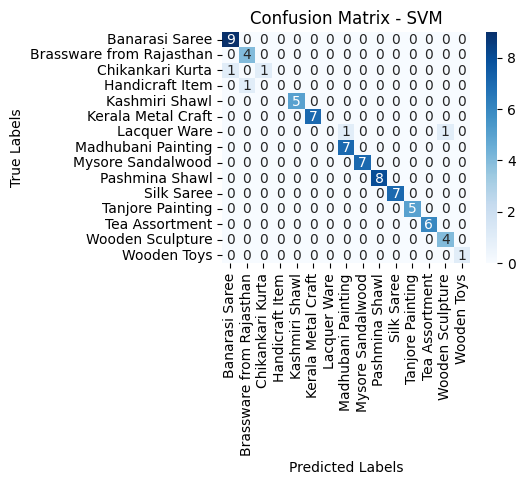


SVM Performance (Fold 2):
 Accuracy: 0.8933
                          precision    recall  f1-score   support

          Banarasi Saree       0.91      1.00      0.95        10
Brassware from Rajasthan       1.00      1.00      1.00         3
        Chikankari Kurta       1.00      0.00      0.00         3
         Handicraft Item       1.00      0.00      0.00         1
          Kashmiri Shawl       1.00      1.00      1.00         4
      Kerala Metal Craft       0.88      1.00      0.93         7
            Lacquer Ware       1.00      0.00      0.00         2
      Madhubani Painting       0.86      1.00      0.92         6
       Mysore Sandalwood       1.00      1.00      1.00         8
          Pashmina Shawl       1.00      1.00      1.00         8
              Silk Saree       0.78      1.00      0.88         7
        Tanjore Painting       0.80      0.80      0.80         5
          Tea Assortment       0.83      1.00      0.91         5
        Wooden Sculpture      

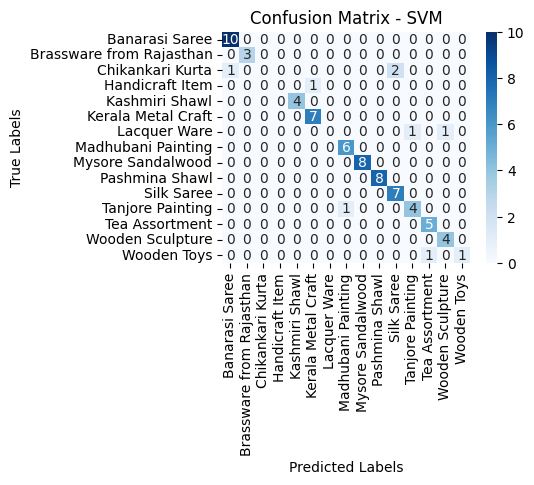


SVM Average Accuracy (Cross-Validated): 0.9200

🎁 Personalized Gift Recommendation Report
👤 Visitor: Bruce Alan
🌍 Country: Canada
🎉 Festival: Baisakhi
🏆 Best Model: Logistic Regression with Accuracy 96.00%
🎁 Recommended Gift: Silk Saree
🏷️ Category: Clothing
📜 Description: Traditional Indian attire


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from google.colab import files

# Step 1: Upload CSV File
uploaded = files.upload()
file_path = list(uploaded.keys())[0]

def load_data(file_path):
    """Loads the dataset and detects separator issues."""
    try:
        df = pd.read_csv(file_path, sep=None, engine="python")
        print(f"Dataset Loaded: {df.shape[0]} rows, {df.shape[1]} columns")
        print(f"Columns Detected: {df.columns.tolist()}")
        return df
    except Exception as e:
        print(f"Error loading file: {e}")
        return None

# ✅ Step 2: Data Preprocessing

def preprocess_data(df):
    """Preprocesses the dataset: handles missing values and encodes categorical data."""
    df.columns = df.columns.str.strip().str.lower()
    features = ["suitable_for_profile", "price", "preferences", "gift_description", "gift_category", "country"]
    target = "gift_name"

    df.fillna({"preferences": df["preferences"].mode()[0]}, inplace=True)
    df['price'] = pd.to_numeric(df['price'], errors='coerce')
    df[features + [target]] = df[features + [target]].astype(str)
    return df, features, target


def build_pipeline(model):
    """Builds a pipeline for preprocessing and model training."""
    numeric_features = ["price"]
    categorical_features = ["suitable_for_profile", "preferences", "gift_description", "gift_category", "country"]

    numeric_transformer = StandardScaler()
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')

    preprocessor = ColumnTransformer([
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    return pipeline

def plot_confusion_matrix(y_true, y_pred, model_name):
    """Generates and plots the confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# ✅ Step 3: Model Training & Evaluation
# Function to train and evaluate models

def train_and_evaluate(X, y, features, target):
    """Trains multiple models and evaluates performance using StratifiedKFold cross-validation."""
    models = {
        "Logistic Regression": LogisticRegression(max_iter=2000),
        "SVM": SVC(C=1, kernel='rbf'),
    }
    results, trained_models = {}, {}

    skf = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

    for name, model in models.items():
        pipeline = build_pipeline(model)
        scores = []

        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)

            scores.append(accuracy_score(y_test, y_pred))

            # Print classification report
            print(f"\n{name} Performance (Fold {len(scores)}):")
            print(f" Accuracy: {scores[-1]:.4f}")
            print(classification_report(y_test, y_pred, zero_division=1))

            # Plot confusion matrix
            plot_confusion_matrix(y_test, y_pred, name)

        acc = np.mean(scores)
        results[name] = acc
        trained_models[name] = pipeline
        print(f"\n{name} Average Accuracy (Cross-Validated): {acc:.4f}")

    best_model_name = max(results, key=results.get)
    best_model = build_pipeline(models[best_model_name])
    best_model.fit(X, y)
    return best_model, best_model_name, results[best_model_name]

# ✅ Step 4: Execute the Pipeline
df = load_data(file_path)
if df is not None:
    df, features, target = preprocess_data(df)
    X, y = df[features], df[target]
    best_model, best_model_name, best_model_accuracy = train_and_evaluate(X, y, features, target)

    # Example Prediction
    visitor_example = df.iloc[0]
    predicted_gift = best_model.predict(X.iloc[[0]])[0]

    print(f"\n🎁 Personalized Gift Recommendation Report")
    print(f"👤 Visitor: {visitor_example.get('visitor_name', 'Unknown')}")
    print(f"🌍 Country: {visitor_example.get('country', 'Unknown')}")
    print(f"🎉 Festival: {visitor_example.get('festival', 'Unknown')}")
    print(f"🏆 Best Model: {best_model_name} with Accuracy {best_model_accuracy:.2%}")
    print(f"🎁 Recommended Gift: {predicted_gift}")
    print(f"🏷️ Category: {visitor_example.get('gift_category', 'No Category Available')}")
    print(f"📜 Description: {visitor_example.get('gift_description', 'No Description Available')}")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

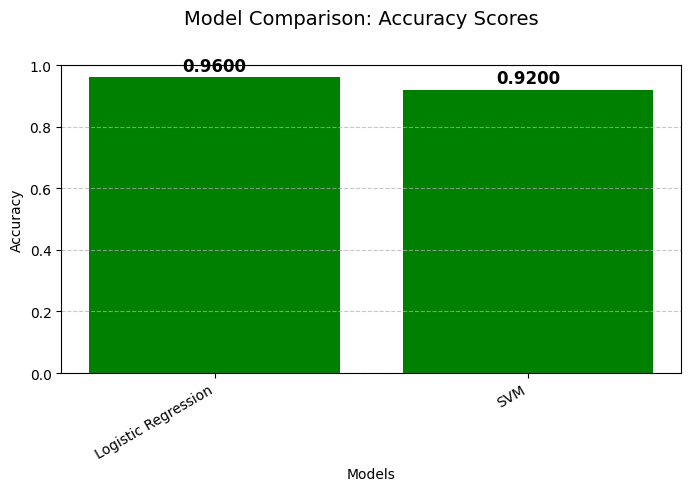

In [ ]:
import matplotlib.pyplot as plt

# Assuming results is a dictionary with model names as keys and accuracy scores as values
results = {
    "Logistic Regression": 0.96,
    "SVM": 0.92,
  }

# Extract model names and accuracy scores
models = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(8, 4))  # Set the figure size
plt.bar(models, accuracies, color='green')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.suptitle("Model Comparison: Accuracy Scores", y=1.02, fontsize=14)  # Adjusted y for better positioning
plt.xticks(rotation=30, ha="right")  # Rotate labels for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Annotate bars with accuracy values
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, f"{v:.4f}", ha="center", fontsize=12, fontweight="bold")

plt.show()


Dataset Loaded: 150 rows, 12 columns
Columns Detected: ['visitor_id', 'visitor_name', 'gift_id', 'gift_name', 'gift_description', 'gift_category', 'price', 'state', 'suitable_for_profile', 'preferences', 'festival', 'country']

📊 Basic Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   visitor_id            150 non-null    int64 
 1   visitor_name          150 non-null    object
 2   gift_id               150 non-null    int64 
 3   gift_name             150 non-null    object
 4   gift_description      150 non-null    object
 5   gift_category         150 non-null    object
 6   price                 150 non-null    object
 7   state                 150 non-null    object
 8   suitable_for_profile  150 non-null    object
 9   preferences           150 non-null    object
 10  festival              150 non-null    ob

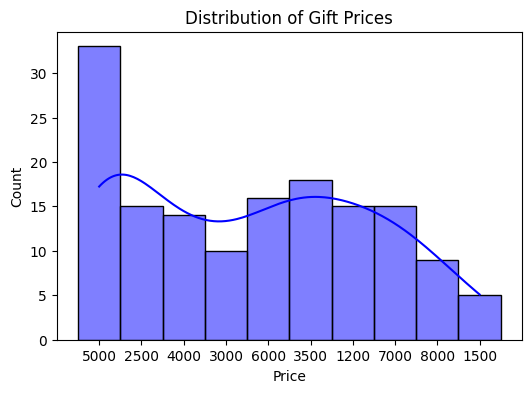

<ipython-input-2-eb9d8eaa90a5>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette='viridis')


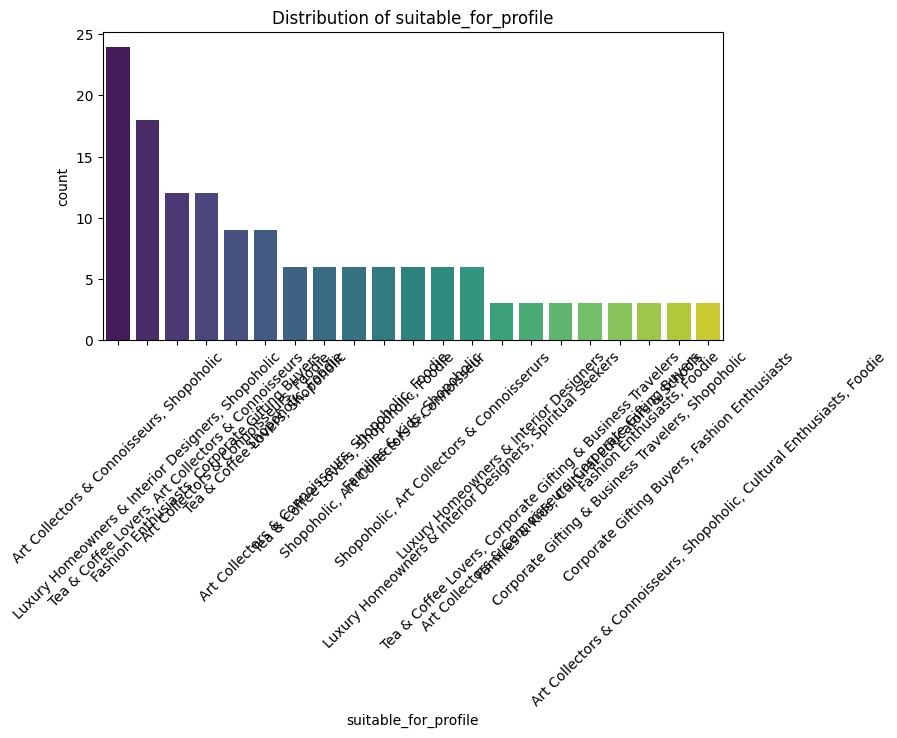

<ipython-input-2-eb9d8eaa90a5>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette='viridis')


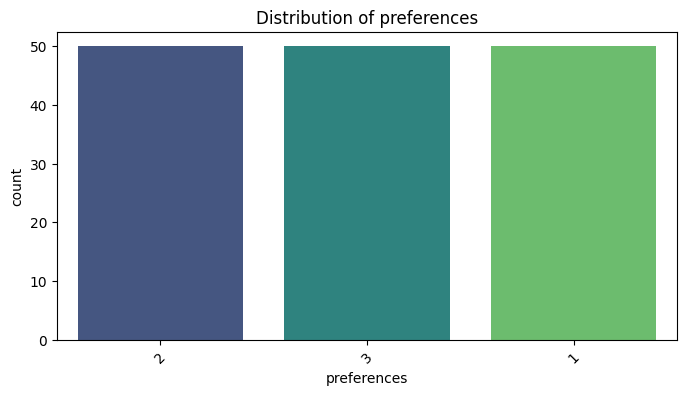

<ipython-input-2-eb9d8eaa90a5>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette='viridis')


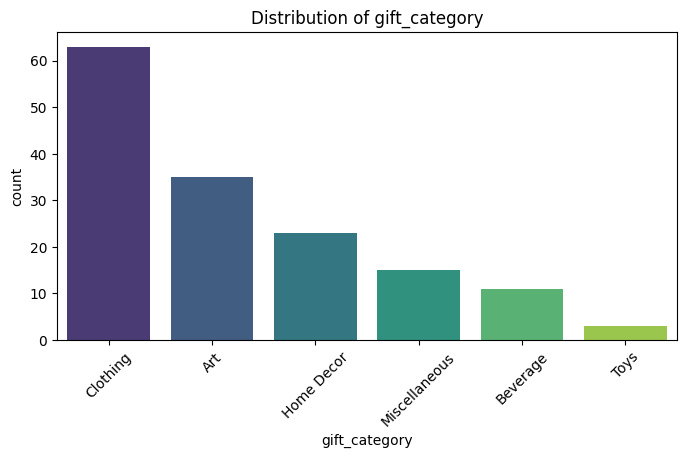

<ipython-input-2-eb9d8eaa90a5>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette='viridis')


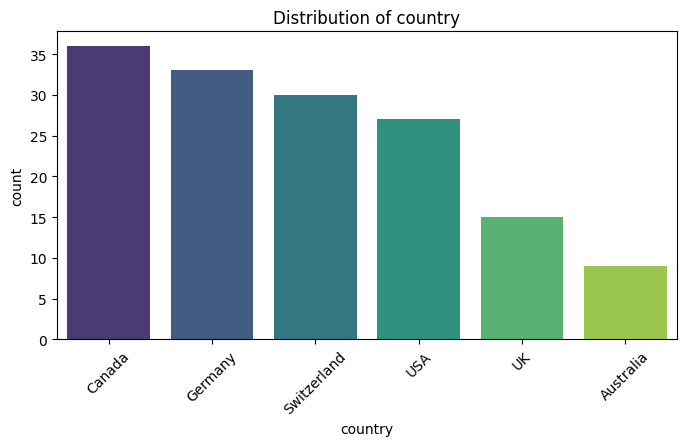

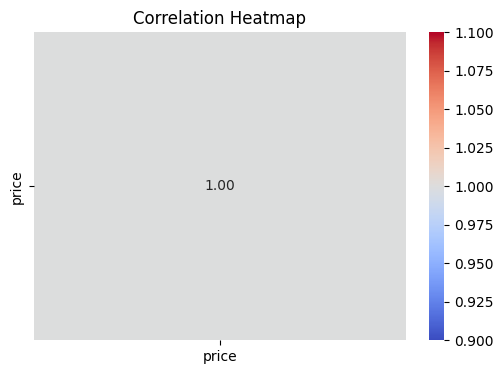


✅ EDA Completed Successfully!

Logistic Regression Performance (Fold 1):
 Accuracy: 0.9733
                          precision    recall  f1-score   support

          Banarasi Saree       1.00      1.00      1.00         9
Brassware from Rajasthan       0.80      1.00      0.89         4
        Chikankari Kurta       1.00      1.00      1.00         2
         Handicraft Item       1.00      0.00      0.00         1
          Kashmiri Shawl       1.00      1.00      1.00         5
      Kerala Metal Craft       1.00      1.00      1.00         7
            Lacquer Ware       1.00      0.50      0.67         2
      Madhubani Painting       1.00      1.00      1.00         7
       Mysore Sandalwood       1.00      1.00      1.00         7
          Pashmina Shawl       1.00      1.00      1.00         8
              Silk Saree       1.00      1.00      1.00         7
        Tanjore Painting       1.00      1.00      1.00         5
          Tea Assortment       1.00      1.00    

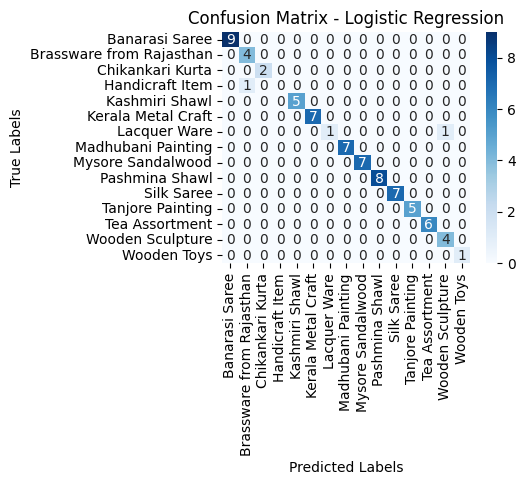


Logistic Regression Performance (Fold 2):
 Accuracy: 0.9467
                          precision    recall  f1-score   support

          Banarasi Saree       1.00      1.00      1.00        10
Brassware from Rajasthan       1.00      1.00      1.00         3
        Chikankari Kurta       1.00      1.00      1.00         3
         Handicraft Item       1.00      0.00      0.00         1
          Kashmiri Shawl       1.00      1.00      1.00         4
      Kerala Metal Craft       0.88      1.00      0.93         7
            Lacquer Ware       1.00      0.50      0.67         2
      Madhubani Painting       0.75      1.00      0.86         6
       Mysore Sandalwood       1.00      1.00      1.00         8
          Pashmina Shawl       1.00      1.00      1.00         8
              Silk Saree       1.00      1.00      1.00         7
        Tanjore Painting       1.00      0.80      0.89         5
          Tea Assortment       0.83      1.00      0.91         5
        Wooden

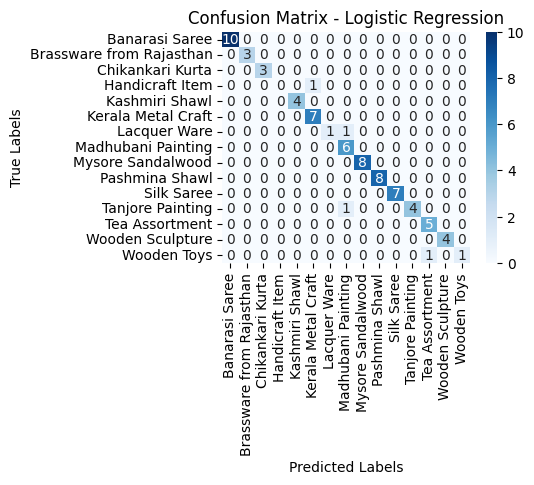


Logistic Regression Average Accuracy (Cross-Validated): 0.9600

SVM Performance (Fold 1):
 Accuracy: 0.9467
                          precision    recall  f1-score   support

          Banarasi Saree       0.90      1.00      0.95         9
Brassware from Rajasthan       0.80      1.00      0.89         4
        Chikankari Kurta       1.00      0.50      0.67         2
         Handicraft Item       1.00      0.00      0.00         1
          Kashmiri Shawl       1.00      1.00      1.00         5
      Kerala Metal Craft       1.00      1.00      1.00         7
            Lacquer Ware       1.00      0.00      0.00         2
      Madhubani Painting       0.88      1.00      0.93         7
       Mysore Sandalwood       1.00      1.00      1.00         7
          Pashmina Shawl       1.00      1.00      1.00         8
              Silk Saree       1.00      1.00      1.00         7
        Tanjore Painting       1.00      1.00      1.00         5
          Tea Assortment       1

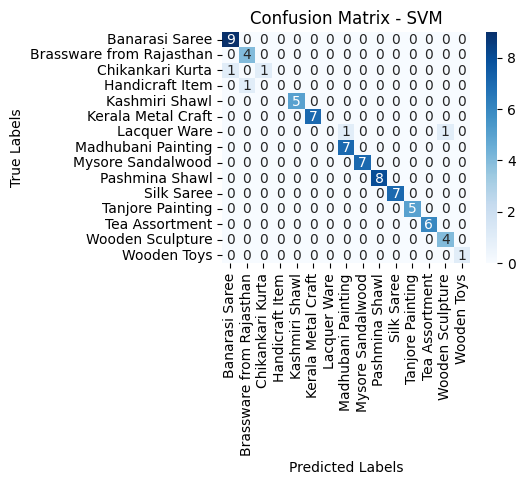


SVM Performance (Fold 2):
 Accuracy: 0.8933
                          precision    recall  f1-score   support

          Banarasi Saree       0.91      1.00      0.95        10
Brassware from Rajasthan       1.00      1.00      1.00         3
        Chikankari Kurta       1.00      0.00      0.00         3
         Handicraft Item       1.00      0.00      0.00         1
          Kashmiri Shawl       1.00      1.00      1.00         4
      Kerala Metal Craft       0.88      1.00      0.93         7
            Lacquer Ware       1.00      0.00      0.00         2
      Madhubani Painting       0.86      1.00      0.92         6
       Mysore Sandalwood       1.00      1.00      1.00         8
          Pashmina Shawl       1.00      1.00      1.00         8
              Silk Saree       0.78      1.00      0.88         7
        Tanjore Painting       0.80      0.80      0.80         5
          Tea Assortment       0.83      1.00      0.91         5
        Wooden Sculpture      

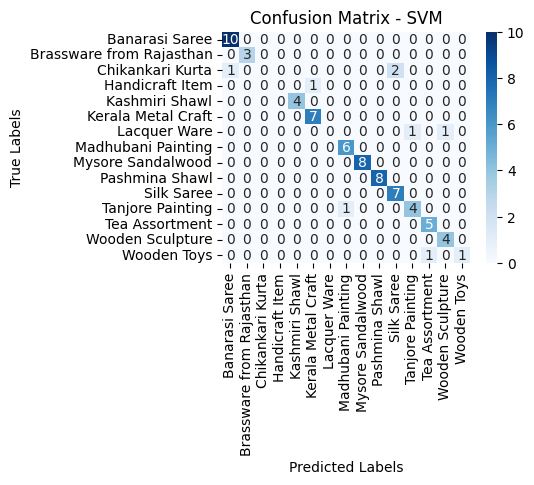


SVM Average Accuracy (Cross-Validated): 0.9200

🎁 Personalized Gift Recommendation Report
👤 Visitor: Bruce Alan
🌍 Country: Canada
🎉 Festival: Baisakhi
🏆 Best Model: Logistic Regression with Accuracy 96.00%
🎁 Recommended Gift: Silk Saree
🏷️ Category: Clothing
📜 Description: Traditional Indian attire


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = load_data(file_path)
if df is not None:
    df, features, target = preprocess_data(df)

    # 1️⃣ Basic Info about Data
    print("\n📊 Basic Dataset Info:")
    print(df.info())
    print("\n🔍 First 5 Rows of Data:")
    print(df.head())
    print("\n🔢 Summary Statistics:")
    print(df.describe(include='all'))

    # 2️⃣ Checking Missing Values
    print("\n🚨 Missing Values:")
    print(df.isnull().sum())

    # 3️⃣ Visualizing Distribution of Numeric Feature 'Price'
    plt.figure(figsize=(6,4))
    sns.histplot(df['price'], bins=20, kde=True, color='blue')
    plt.title('Distribution of Gift Prices')
    plt.xlabel('Price')
    plt.ylabel('Count')
    plt.show()

    # 4️⃣ Count Plots for Categorical Features
    cat_features = ['suitable_for_profile', 'preferences', 'gift_category', 'country']
    for feature in cat_features:
        plt.figure(figsize=(8,4))
        sns.countplot(data=df, x=feature, order=df[feature].value_counts().index, palette='viridis')
        plt.xticks(rotation=45)
        plt.title(f'Distribution of {feature}')
        plt.show()

    # 5️⃣ Correlation Heatmap for Numeric Features
    plt.figure(figsize=(6,4))
    sns.heatmap(df[['price']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()

    print("\n✅ EDA Completed Successfully!")

    # Proceed with Model Training & Evaluation
    X, y = df[features], df[target]
    best_model, best_model_name, best_model_accuracy = train_and_evaluate(X, y, features, target)

    # Example Prediction
    visitor_example = df.iloc[0]
    predicted_gift = best_model.predict(X.iloc[[0]])[0]

    print(f"\n🎁 Personalized Gift Recommendation Report")
    print(f"👤 Visitor: {visitor_example.get('visitor_name', 'Unknown')}")
    print(f"🌍 Country: {visitor_example.get('country', 'Unknown')}")
    print(f"🎉 Festival: {visitor_example.get('festival', 'Unknown')}")
    print(f"🏆 Best Model: {best_model_name} with Accuracy {best_model_accuracy:.2%}")
    print(f"🎁 Recommended Gift: {predicted_gift}")
    print(f"🏷️ Category: {visitor_example.get('gift_category', 'No Category Available')}")
    print(f"📜 Description: {visitor_example.get('gift_description', 'No Description Available')}")


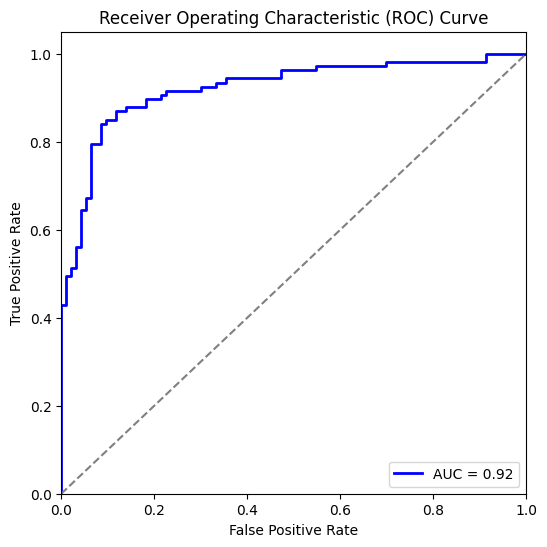

AUC-ROC Score: 0.9216


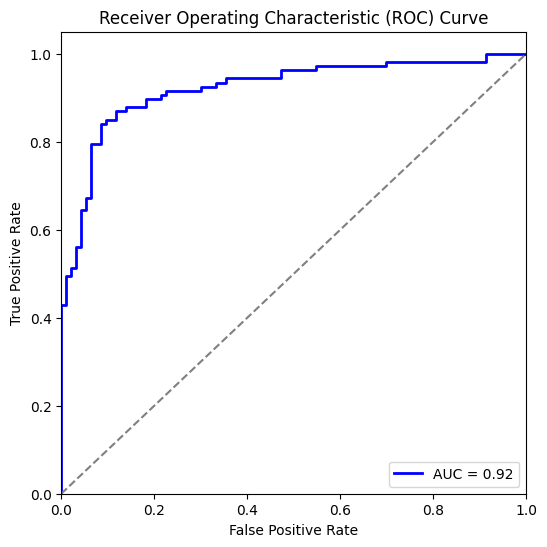

AUC-ROC Score: 0.9216


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Get probability for class 1

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot AUC-ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC Score
print(f"AUC-ROC Score: {roc_auc:.4f}")
# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]  # Get probability for class 1

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot AUC-ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Print AUC Score
print(f"AUC-ROC Score: {roc_auc:.4f}")
